# Análisis de Competencia en Contratos Menores (2020-2025)
### Identificación de oportunidades geográficas para empresas proveedoras

---

## 1. Contexto

Los contratos menores representan una vía de acceso estratégica para PYMEs al sector público. Sin embargo, muchos mercados locales presentan alta concentración de proveedores, limitando la entrada de nuevos competidores.

**Objetivo**: Identificar provincias y localidades con baja competencia donde nuevas empresas pueden competir efectivamente.

---

## 2. Marco Legal

**Umbrales de contratos menores (sin IVA)**:
- **Servicios y suministros**: < 15.000 €
- **Obras**: < 40.000 €
- **Excepción I+D+i**: < 50.000 € (entidades científicas)

**Nota**: Contratos < 5.000 € pueden no publicarse individualmente.

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import unicodedata
import re
from pathlib import Path

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

# Obtener la ruta raíz del proyecto
notebook_dir = Path.cwd() # Asumiendo que este script se ejecuta desde el directorio del notebook
project_root = notebook_dir.parent

# Ruta al dataset
data_path = project_root / "data" / "export" / "contratos_menores_test.parquet"


%matplotlib inline

## 3. Carga de Datos

In [5]:
# Cargar dataset desde export
df = pd.read_parquet(data_path)

print(f"✅ Dataset cargado: {len(df)} registros")


✅ Dataset cargado: 50247 registros


In [6]:
print(f"Total registros: {len(df):,}")
print(f"Periodo: {df['fecha_adjudicacion'].min()} → {df['fecha_adjudicacion'].max()}")
print(f"\nColumnas: {df.shape[1]}")

Total registros: 50,247
Periodo: 2005-05-23 00:00:00 → 2025-07-31 00:00:00

Columnas: 29


In [7]:
# Vista general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50247 entries, 0 to 50246
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_entry_num             50247 non-null  object        
 1   id_entry                 50247 non-null  object        
 2   titulo                   50247 non-null  object        
 3   id_licitacion            50247 non-null  object        
 4   fecha_actualizacion      50247 non-null  datetime64[ns]
 5   fecha_adjudicacion       50217 non-null  datetime64[ns]
 6   estado                   50247 non-null  object        
 7   tipo_contrato            50247 non-null  object        
 8   codigo_subtipo_contrato  49112 non-null  object        
 9   importe_estimado         28030 non-null  float64       
 10  importe_total            50247 non-null  float64       
 11  importe_sin_impuestos    50247 non-null  float64       
 12  codigo_cpv_principal     23318 n

In [8]:
# Muestra aleatoria
df.sample(5, random_state=42)

,id_entry_num,id_entry,titulo,id_licitacion,fecha_actualizacion,fecha_adjudicacion,estado,tipo_contrato,codigo_subtipo_contrato,importe_estimado,importe_total,importe_sin_impuestos,codigo_cpv_principal,codigo_region_nuts,ofertas_recibidas,id_plataforma,empresa_nombre,nif_empresa,empresa_es_pyme,empresa_pais,organo_nombre,organo_dir3,organo_postalcode,organo_localidad,organo_email,organo_telefono,organo_nif,tipo_organo,actividad_organo
1640,17577169,https://contrataciondelestado.es/sindicacion/datosAbiertosMenores/17577169,Adquisición de contenedores de residuos sólidos urbanos (10 unidades),3/2025 45,2025-06-30 11:45:02,2025-05-19,RES,Suministros,2,1423.5,1722.44,1423.50,34928480,ES614,1,31169380160698,Contelogic S.L.,B44754059,true,ES,Alcaldía del Ayuntamiento de Zújar,L01181942,18811,Zújar,secretaria@aytozujar.es,958716017,P1819800B,Autoridad local,Justicia
43048,17742034,https://contrataciondelestado.es/sindicacion/datosAbiertosMenores/17742034,Suministro de comidas para la Convivencia Juvenil 2025,4185/2025,2025-07-25 13:58:05,2025-03-07,RES,Servicios,17,465.0,497.55,465.00,55320000,ES70,1,31049400148700,Ehedei Rodríguez Llarena,43293251Y,true,ES,Alcaldia del Ayuntamiento de Mogán,L01350120,35140,Mogán,contratacion@mogan.es,158800,P3501300B,Autoridad local,Justicia
5610,17599564,https://contrataciondelestado.es/sindicacion/datosAbiertosMenores/17599564,933 Actividades y talleres infantiles semana del agua el 24/06/2025. Org Jmpal.,933-2025-22025015805,2025-07-03 13:46:41,2025-06-19,RES,Servicios,27,NaN,1500.00,1239.67,None,ES620,1,30791010122861,"HIPOCAMPUS EVENTOS ARTISTICOS, SL",B05521133,true,ES,Junta de Gobierno del Ayuntamiento de Murcia,L01300308,30004,Murcia,contratacion@ayto-murcia.es,968358600,P3003000A,Autoridad local,Justicia
32071,17692033,https://contrataciondelestado.es/sindicacion/datosAbiertosMenores/17692033,Videos promocionales y grabación de fiestas de Moros y Cristianos,1088/2025,2025-07-17 11:57:12,2025-06-02,RES,Servicios,13,1477.0,1787.17,1477.00,None,ES521,1,30644820108242,Cándido Navarro Martínez,22141540S,false,ES,Alcaldía del Ayuntamiento de Agost,L01030020,03698,Agost,ajuntament@agost.es,965691043,P0300200C,Autoridad local,Justicia
40982,17728097,https://contrataciondelestado.es/sindicacion/datosAbiertosMenores/17728097,Adquisición de un ordenador portátil HP Victus,P8-MMT24-5,2025-07-23 11:30:50,2025-06-02,RES,Suministros,2,NaN,1936.00,1600.00,None,ES300,1,61707800214540,TETRABIT DISTRIBUIDORA DE MATERIAL INFORMATICO,B96807987,true,ES,Gerencias de los Institutos de la Agencia Estatal Consejo Superior de Invest...,EA0020951,28006,Madrid,sgoi@csic.es,915681781,Q2818002D,Organismo de Derecho público bajo el control de una autoridad estatal,Justicia


## 4. Preparación de Datos

In [9]:
# Normalizar fechas
df['fecha_actualizacion'] = pd.to_datetime(df['fecha_actualizacion'])
df['fecha_adjudicacion'] = pd.to_datetime(df['fecha_adjudicacion'])

# Filtrar periodo de análisis
df = df[
    (df['fecha_adjudicacion'] >= '2020-01-01') & 
    (df['fecha_adjudicacion'] <= '2025-10-31')
].copy()

print(f"Registros tras filtro temporal: {len(df):,}")

Registros tras filtro temporal: 50,209


In [10]:
# Variables temporales
df['year'] = df['fecha_adjudicacion'].dt.year
df['month'] = df['fecha_adjudicacion'].dt.month
df['quarter'] = df['fecha_adjudicacion'].dt.to_period('Q')
df['year_month'] = df['fecha_adjudicacion'].dt.to_period('M')

### 4.1 Segmentación por Umbral Legal

Clasificamos los contratos según su conformidad con los límites legales:

In [11]:
# Normalizar tipo de contrato
df['tipo_contrato_norm'] = df['tipo_contrato'].str.lower().str.strip()

# Segmentación
df_umbral = df[
    (
        (df['tipo_contrato_norm'] == 'obras') &
        (df['importe_sin_impuestos'] <= 40_000)
    )
    |
    (
        (df['tipo_contrato_norm'] != 'obras') &
        (df['importe_sin_impuestos'] <= 15_000)
    )
].copy()

df_50k = df[
    (df['tipo_contrato_norm'] != 'obras') &
    (df['importe_sin_impuestos'].between(15_000, 50_000))
].copy()

df_atipico = df[
    ~df.index.isin(df_umbral.index) &
    ~df.index.isin(df_50k.index)
].copy()

print(f"Umbral estándar: {len(df_umbral):,} ({len(df_umbral)/len(df)*100:.1f}%)")
print(f"Excepción 50k:   {len(df_50k):,} ({len(df_50k)/len(df)*100:.1f}%)")
print(f"Atípicos:        {len(df_atipico):,} ({len(df_atipico)/len(df)*100:.1f}%)")

Umbral estándar: 49,848 (99.3%)
Excepción 50k:   424 (0.8%)
Atípicos:        28 (0.1%)


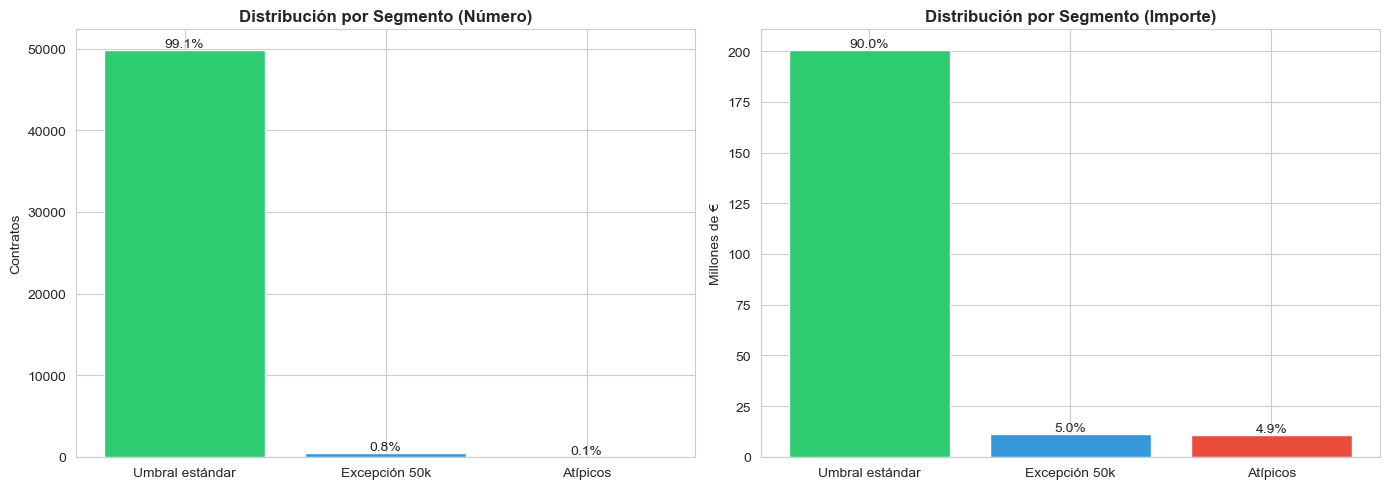

In [12]:
# Visualización de segmentación
labels = ['Umbral estándar', 'Excepción 50k', 'Atípicos']
counts = [len(df_umbral), len(df_50k), len(df_atipico)]
importes = [
    df_umbral['importe_sin_impuestos'].sum() / 1e6,
    df_50k['importe_sin_impuestos'].sum() / 1e6,
    df_atipico['importe_sin_impuestos'].sum() / 1e6
]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Número de contratos
axes[0].bar(labels, counts, color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_title('Distribución por Segmento (Número)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Contratos')
for i, v in enumerate(counts):
    axes[0].text(i, v, f'{v/sum(counts)*100:.1f}%', ha='center', va='bottom')

# Importe
axes[1].bar(labels, importes, color=['#2ecc71', '#3498db', '#e74c3c'])
axes[1].set_title('Distribución por Segmento (Importe)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Millones de €')
for i, v in enumerate(importes):
    axes[1].text(i, v, f'{v/sum(importes)*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Conclusión**: Trabajaremos con `df_umbral` para el análisis de competencia.

---

## 5. Análisis Exploratorio (EDA)

### 5.1 Distribución de Importes

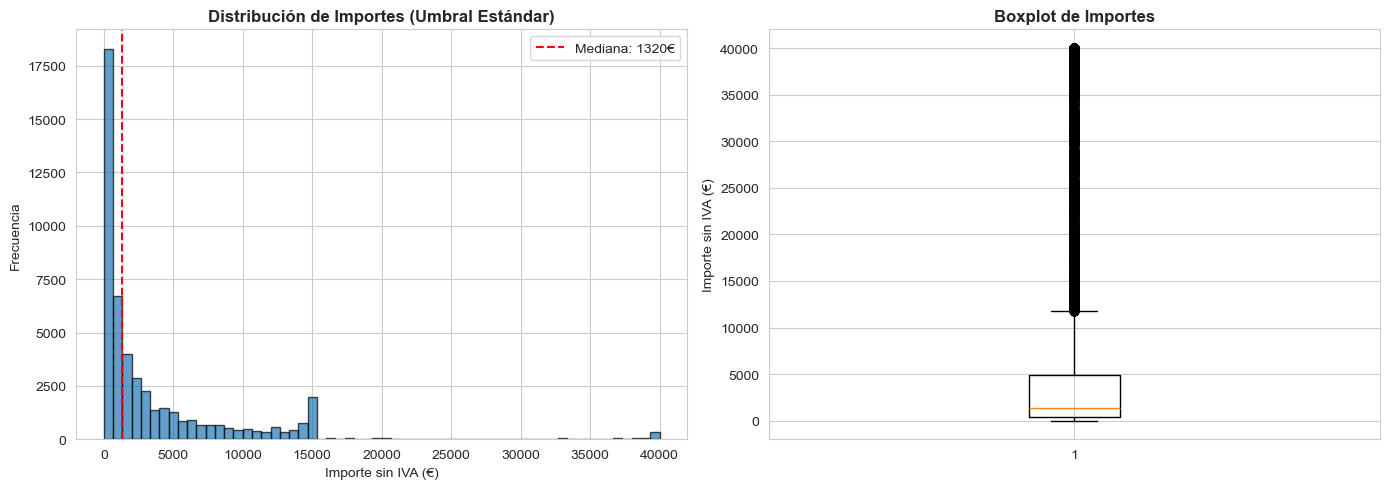

Estadísticas descriptivas:
count    49848.000000
mean      4025.335015
std       6403.067755
min          0.000000
25%        350.000000
50%       1320.000000
75%       4924.775000
max      40000.000000
Name: importe_sin_impuestos, dtype: float64


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df_umbral['importe_sin_impuestos'], bins=60, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Importes (Umbral Estándar)', fontweight='bold')
axes[0].set_xlabel('Importe sin IVA (€)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df_umbral['importe_sin_impuestos'].median(), color='red', 
                linestyle='--', label=f"Mediana: {df_umbral['importe_sin_impuestos'].median():.0f}€")
axes[0].legend()

# Boxplot
axes[1].boxplot(df_umbral['importe_sin_impuestos'], vert=True)
axes[1].set_title('Boxplot de Importes', fontweight='bold')
axes[1].set_ylabel('Importe sin IVA (€)')

plt.tight_layout()
plt.show()

print(f"Estadísticas descriptivas:")
print(df_umbral['importe_sin_impuestos'].describe())

### 5.2 Evolución Temporal

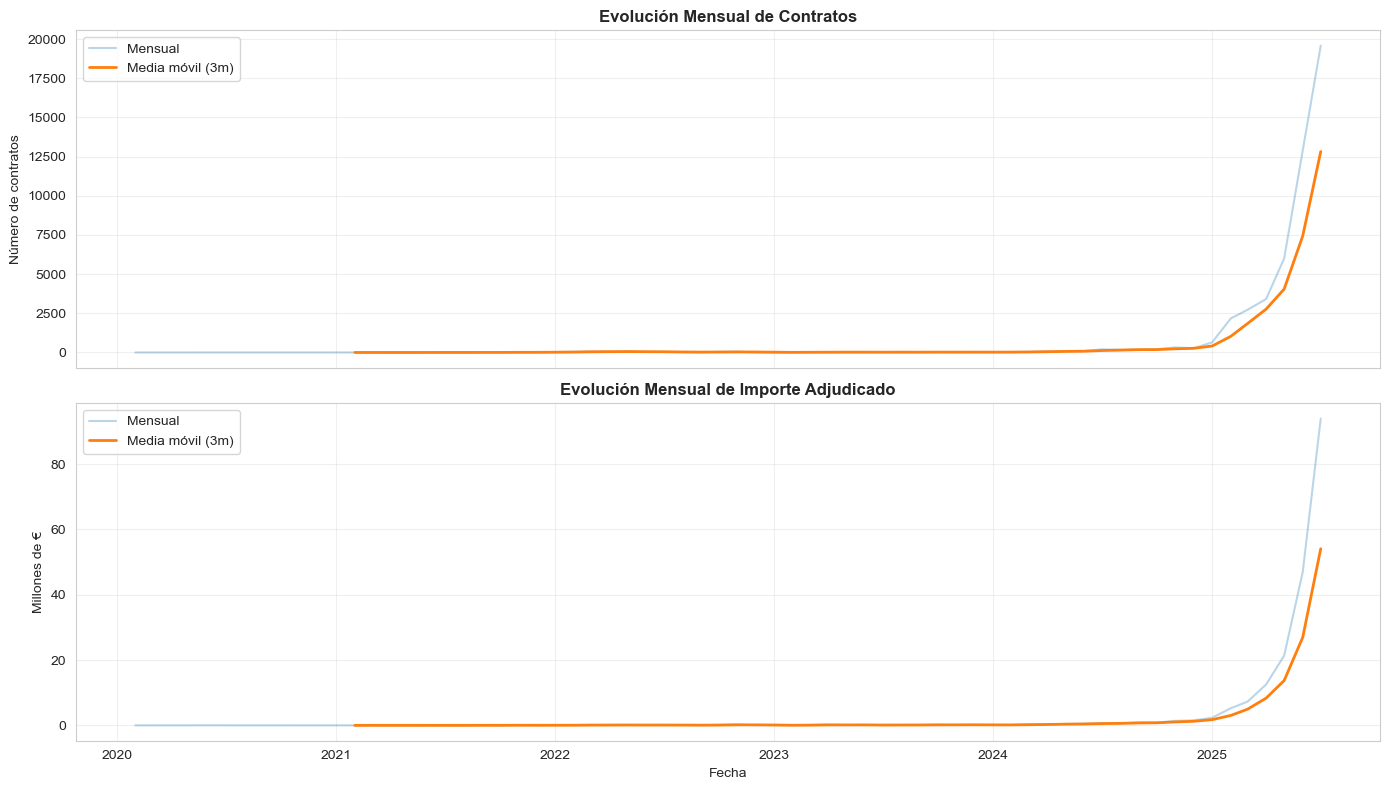

In [14]:
# Agregación mensual
df_mensual = (
    df_umbral
    .groupby('year_month')
    .agg(
        contratos=('id_entry', 'count'),
        importe_total=('importe_sin_impuestos', 'sum')
    )
    .sort_index()
)

df_mensual['importe_millones'] = df_mensual['importe_total'] / 1e6
df_mensual['contratos_ma'] = df_mensual['contratos'].rolling(3).mean()
df_mensual['importe_ma'] = df_mensual['importe_millones'].rolling(3).mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Contratos
axes[0].plot(df_mensual.index.to_timestamp(), df_mensual['contratos'], 
             alpha=0.3, label='Mensual')
axes[0].plot(df_mensual.index.to_timestamp(), df_mensual['contratos_ma'], 
             linewidth=2, label='Media móvil (3m)')
axes[0].set_title('Evolución Mensual de Contratos', fontweight='bold')
axes[0].set_ylabel('Número de contratos')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Importe
axes[1].plot(df_mensual.index.to_timestamp(), df_mensual['importe_millones'], 
             alpha=0.3, label='Mensual')
axes[1].plot(df_mensual.index.to_timestamp(), df_mensual['importe_ma'], 
             linewidth=2, label='Media móvil (3m)')
axes[1].set_title('Evolución Mensual de Importe Adjudicado', fontweight='bold')
axes[1].set_ylabel('Millones de €')
axes[1].set_xlabel('Fecha')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Top Organismos Contratantes

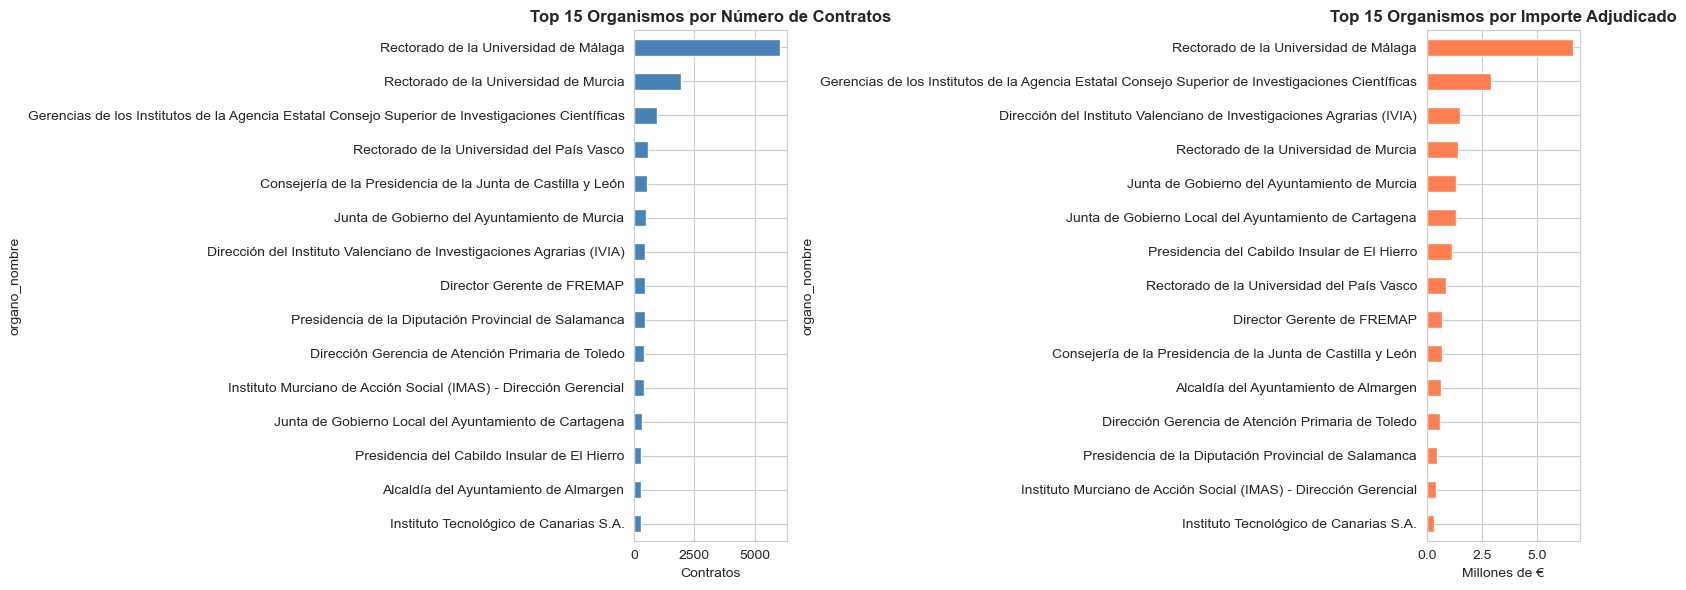

In [15]:
top_organismos = (
    df_umbral
    .groupby('organo_nombre')
    .agg(
        contratos=('id_entry', 'count'),
        importe_total=('importe_sin_impuestos', 'sum')
    )
    .sort_values('contratos', ascending=False)
    .head(15)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Por número
top_organismos['contratos'].sort_values().plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Top 15 Organismos por Número de Contratos', fontweight='bold')
axes[0].set_xlabel('Contratos')

# Por importe
(top_organismos['importe_total'] / 1e6).sort_values().plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Top 15 Organismos por Importe Adjudicado', fontweight='bold')
axes[1].set_xlabel('Millones de €')

plt.tight_layout()
plt.show()

### 5.4 Top Empresas Adjudicatarias

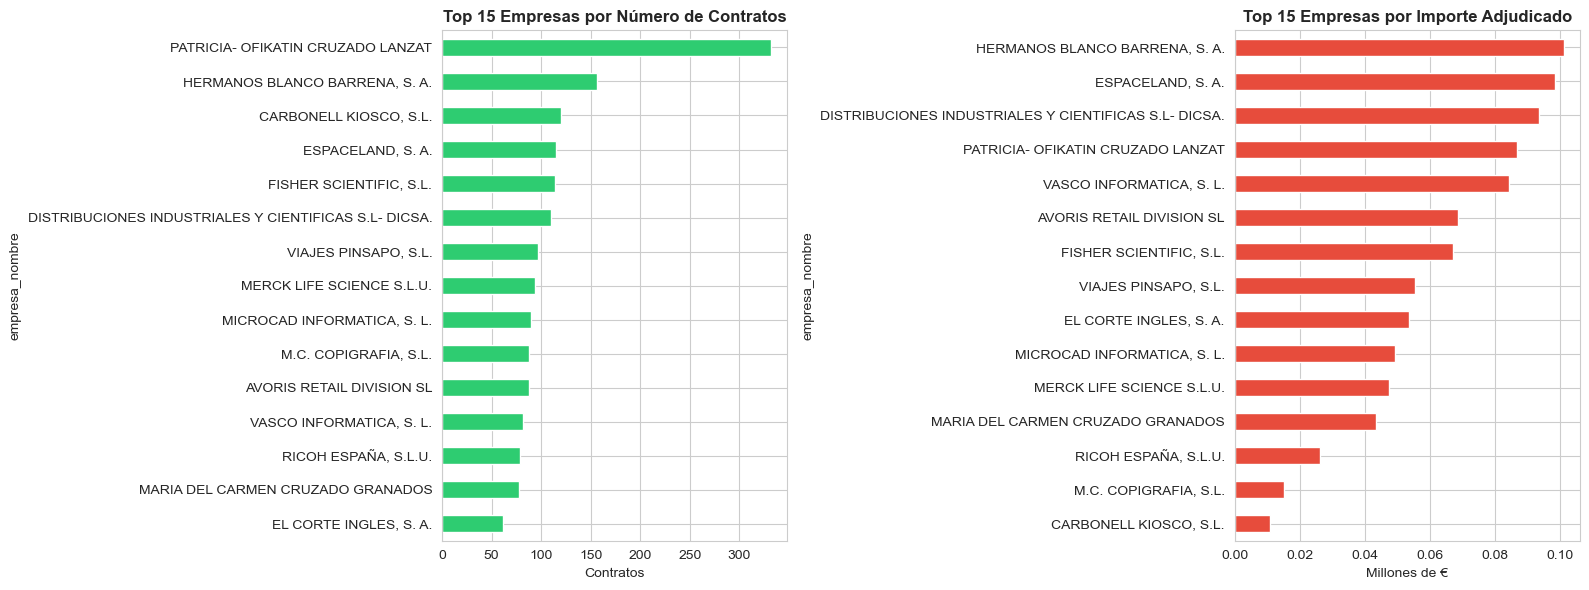

In [16]:
top_empresas = (
    df_umbral
    .groupby('empresa_nombre')
    .agg(
        contratos=('id_entry', 'count'),
        importe_total=('importe_sin_impuestos', 'sum')
    )
    .sort_values('contratos', ascending=False)
    .head(15)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Por número
top_empresas['contratos'].sort_values().plot(kind='barh', ax=axes[0], color='#2ecc71')
axes[0].set_title('Top 15 Empresas por Número de Contratos', fontweight='bold')
axes[0].set_xlabel('Contratos')

# Por importe
(top_empresas['importe_total'] / 1e6).sort_values().plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('Top 15 Empresas por Importe Adjudicado', fontweight='bold')
axes[1].set_xlabel('Millones de €')

plt.tight_layout()
plt.show()

### 5.5 Distribución por Tipo de Contrato

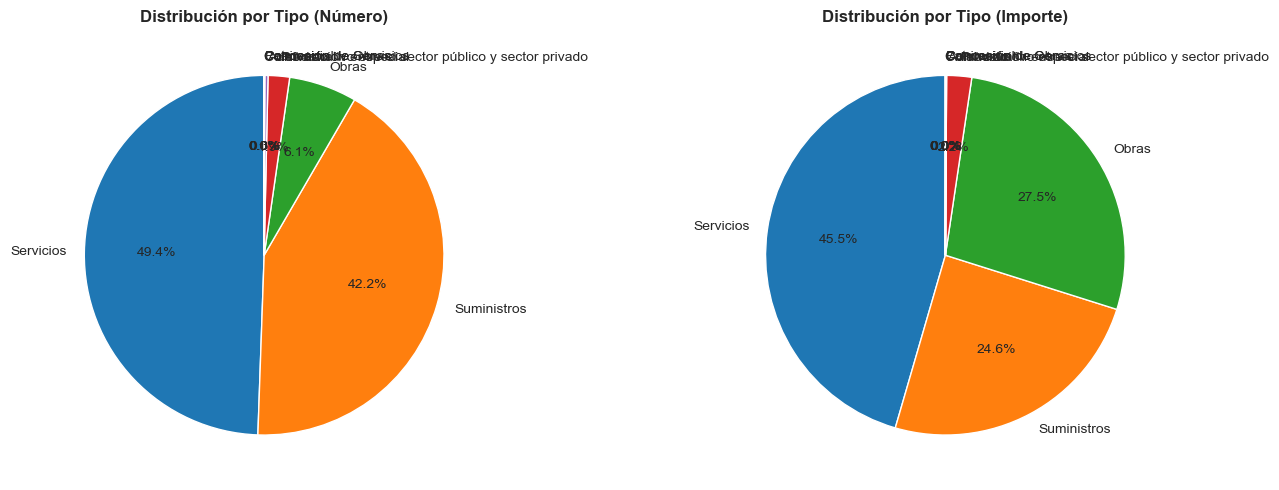


Detalle por tipo:
                                                       contratos  \
tipo_contrato                                                      
Servicios                                                  24647   
Suministros                                                21024   
Obras                                                       3043   
Privado                                                      962   
Administrativo especial                                      144   
Patrimonial                                                   18   
Concesión de Servicios                                         7   
Concesión de Obras                                             2   
Colaboración entre el sector público y sector privado          1   

                                                       importe_total  
tipo_contrato                                                         
Servicios                                                91306595.19  
Suministros        

In [17]:
tipo_contrato = (
    df_umbral
    .groupby('tipo_contrato')
    .agg(
        contratos=('id_entry', 'count'),
        importe_total=('importe_sin_impuestos', 'sum')
    )
    .sort_values('contratos', ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart - contratos
axes[0].pie(tipo_contrato['contratos'], labels=tipo_contrato.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribución por Tipo (Número)', fontweight='bold')

# Pie chart - importe
axes[1].pie(tipo_contrato['importe_total'], labels=tipo_contrato.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución por Tipo (Importe)', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDetalle por tipo:")
print(tipo_contrato)

---

## 6. Análisis de Competencia por Localidad

### 6.1 Carga y Normalización de Localidades

In [18]:
def normalizar_texto(texto):
    """Normaliza texto para matching: lowercase, sin acentos, sin caracteres especiales"""
    if pd.isna(texto):
        return None
    
    texto = str(texto).lower().strip()
    texto = unicodedata.normalize('NFKD', texto)
    texto = ''.join(c for c in texto if not unicodedata.combining(c))
    texto = re.sub(r'[^a-z0-9\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto)
    
    return texto

In [20]:
# Cargar localidades
df_loc = pd.read_csv(
    '../data/export/localidades.csv',
    sep=';',
    encoding='utf-8',
    usecols=[0, 1, 2, 3, 4],
    names=['Comunidad', 'Provincia', 'Localidad', 'Latitud', 'Longitud']
)

print(f"Localidades cargadas: {len(df_loc):,}")
print(f"Provincias únicas: {df_loc['Provincia'].nunique()}")
df_loc.head()

Localidades cargadas: 8,112
Provincias únicas: 52


,Comunidad,Provincia,Localidad,Latitud,Longitud
0,Andalucía,Almería,Abla,37.14114,-2.780104
1,Andalucía,Almería,Abrucena,37.13305,-2.797098
2,Andalucía,Almería,Adra,36.74807,-3.022522
3,Andalucía,Almería,Albánchez,37.28710,-2.181163
4,Andalucía,Almería,Alboloduy,37.03319,-2.621750


In [21]:
# Normalizar
df_loc['localidad_norm'] = df_loc['Localidad'].apply(normalizar_texto)
df_loc['provincia_norm'] = df_loc['Provincia'].apply(normalizar_texto)

df_umbral['localidad_norm'] = df_umbral['organo_localidad'].apply(normalizar_texto)

# Agregación por provincia (centroide)
df_provincias = (
    df_loc
    .groupby('Provincia')
    .agg(
        Latitud=('Latitud', 'mean'),
        Longitud=('Longitud', 'mean'),
        Comunidad=('Comunidad', 'first')
    )
    .reset_index()
)

df_provincias['provincia_norm'] = df_provincias['Provincia'].apply(normalizar_texto)

print(f"\nProvincias agregadas: {len(df_provincias)}")


Provincias agregadas: 52


### 6.2 Matching Geográfico

In [22]:
# Extraer provincia desde localidad (formato común: "CIUDAD (PROVINCIA)")
def extraer_provincia(localidad):
    if pd.isna(localidad):
        return None
    match = re.search(r'\(([^)]+)\)', str(localidad))
    if match:
        return normalizar_texto(match.group(1))
    return normalizar_texto(localidad)

df_umbral['provincia_extraida'] = df_umbral['organo_localidad'].apply(extraer_provincia)

# Merge con provincias
df_umbral = df_umbral.merge(
    df_provincias[['provincia_norm', 'Provincia', 'Latitud', 'Longitud', 'Comunidad']],
    left_on='provincia_extraida',
    right_on='provincia_norm',
    how='left'
)

# Verificar cobertura
cobertura = 1 - df_umbral['Latitud'].isna().mean()
print(f"Cobertura geográfica: {cobertura*100:.1f}%")
print(f"Registros con coordenadas: {(~df_umbral['Latitud'].isna()).sum():,}")

Cobertura geográfica: 48.5%
Registros con coordenadas: 24,201


### 6.3 Análisis de Competencia por Provincia

In [23]:
# Análisis por provincia
df_competencia = (
    df_umbral
    .dropna(subset=['Provincia'])
    .groupby('Provincia')
    .agg(
        num_contratos=('id_entry', 'count'),
        num_empresas=('empresa_nombre', 'nunique'),
        importe_total=('importe_sin_impuestos', 'sum'),
        importe_medio=('importe_sin_impuestos', 'mean'),
        Latitud=('Latitud', 'first'),
        Longitud=('Longitud', 'first'),
        Comunidad=('Comunidad', 'first')
    )
    .reset_index()
)

# Métricas de competencia
df_competencia['ratio_contratos_empresa'] = (
    df_competencia['num_contratos'] / df_competencia['num_empresas']
)

df_competencia['indice_concentracion'] = (
    df_competencia['ratio_contratos_empresa'] / df_competencia['num_contratos']
)

# Clasificación de competencia
def clasificar_competencia(ratio):
    if ratio <= 2:
        return 'Muy Alta'
    elif ratio <= 5:
        return 'Alta'
    elif ratio <= 10:
        return 'Media'
    elif ratio <= 20:
        return 'Baja'
    else:
        return 'Muy Baja'

df_competencia['nivel_competencia'] = (
    df_competencia['ratio_contratos_empresa'].apply(clasificar_competencia)
)

print(f"Total provincias analizadas: {len(df_competencia)}")
print("\nDistribución por nivel de competencia:")
print(df_competencia['nivel_competencia'].value_counts())

Total provincias analizadas: 46

Distribución por nivel de competencia:
nivel_competencia
Muy Alta    44
Alta         2
Name: count, dtype: int64


In [24]:
# Top provincias con BAJA competencia (oportunidad para nuevas empresas)
df_oportunidad = (
    df_competencia[
        (df_competencia['nivel_competencia'].isin(['Baja', 'Muy Baja'])) &
        (df_competencia['num_contratos'] >= 50)  # Filtrar provincias con volumen significativo
    ]
    .sort_values('ratio_contratos_empresa', ascending=False)
    .head(15)
)

print("\n🎯 TOP 15 PROVINCIAS CON MAYOR OPORTUNIDAD (Baja Competencia + Alto Volumen)\n")
print(df_oportunidad[[
    'Provincia', 'Comunidad', 'num_contratos', 'num_empresas', 
    'ratio_contratos_empresa', 'nivel_competencia'
]].to_string(index=False))


🎯 TOP 15 PROVINCIAS CON MAYOR OPORTUNIDAD (Baja Competencia + Alto Volumen)

Empty DataFrame
Columns: [Provincia, Comunidad, num_contratos, num_empresas, ratio_contratos_empresa, nivel_competencia]
Index: []


### 6.4 Visualización: Mapa de Competencia

In [25]:
# Crear mapa de España
mapa = folium.Map(
    location=[40.0, -3.7],
    zoom_start=6,
    tiles='cartodbpositron'
)

# Colores por nivel de competencia
color_map = {
    'Muy Alta': '#2ecc71',
    'Alta': '#3498db',
    'Media': '#f39c12',
    'Baja': '#e67e22',
    'Muy Baja': '#e74c3c'
}

# Añadir marcadores por provincia
for _, row in df_competencia.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=min(25, 5 + np.log1p(row['num_contratos']) * 1.5),
        popup=f"""
        <b>{row['Provincia']}</b> ({row['Comunidad']})<br>
        Contratos: {row['num_contratos']:,}<br>
        Empresas: {row['num_empresas']:,}<br>
        Ratio: {row['ratio_contratos_empresa']:.1f}<br>
        Competencia: <b>{row['nivel_competencia']}</b><br>
        Importe total: {row['importe_total']/1e6:.2f}M€
        """,
        color=color_map.get(row['nivel_competencia'], 'gray'),
        fill=True,
        fill_opacity=0.6,
        weight=2
    ).add_to(mapa)

# Leyenda
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; right: 50px; width: 200px; height: auto; 
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; border-radius: 5px; padding: 10px">
<p style="margin-bottom:5px; font-weight:bold">Nivel de Competencia</p>
<p><span style="color:#2ecc71">●</span> Muy Alta (ratio ≤2)</p>
<p><span style="color:#3498db">●</span> Alta (ratio ≤5)</p>
<p><span style="color:#f39c12">●</span> Media (ratio ≤10)</p>
<p><span style="color:#e67e22">●</span> Baja (ratio ≤20)</p>
<p><span style="color:#e74c3c">●</span> Muy Baja (ratio >20)</p>
</div>
'''
mapa.get_root().html.add_child(folium.Element(legend_html))

# Mostrar mapa
mapa

### 6.5 Visualización: Distribución de Competencia

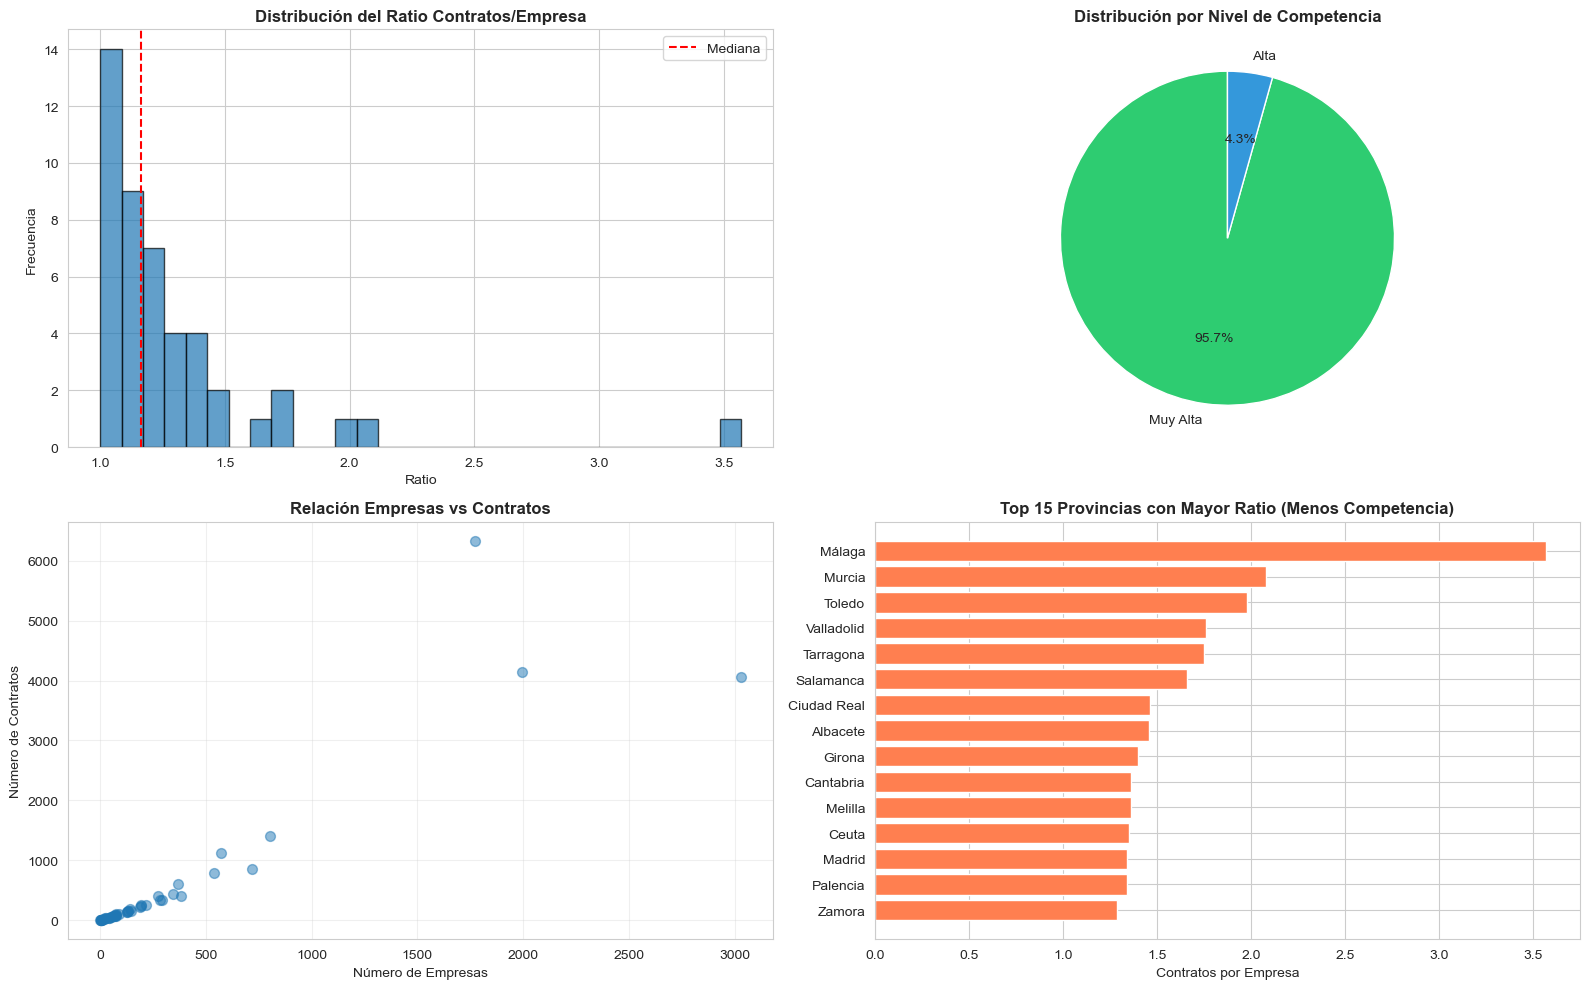

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribución de ratio
axes[0, 0].hist(df_competencia['ratio_contratos_empresa'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_competencia['ratio_contratos_empresa'].median(), 
                   color='red', linestyle='--', label='Mediana')
axes[0, 0].set_title('Distribución del Ratio Contratos/Empresa', fontweight='bold')
axes[0, 0].set_xlabel('Ratio')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

# 2. Nivel de competencia
competencia_counts = df_competencia['nivel_competencia'].value_counts()
axes[0, 1].pie(competencia_counts, labels=competencia_counts.index, autopct='%1.1f%%', startangle=90,
               colors=['#2ecc71', '#3498db', '#f39c12', '#e67e22', '#e74c3c'])
axes[0, 1].set_title('Distribución por Nivel de Competencia', fontweight='bold')

# 3. Scatter: contratos vs empresas
axes[1, 0].scatter(df_competencia['num_empresas'], df_competencia['num_contratos'], 
                   alpha=0.5, s=50)
axes[1, 0].set_title('Relación Empresas vs Contratos', fontweight='bold')
axes[1, 0].set_xlabel('Número de Empresas')
axes[1, 0].set_ylabel('Número de Contratos')
axes[1, 0].grid(True, alpha=0.3)

# 4. Top 15 provincias por ratio
top_ratio = df_competencia.nlargest(15, 'ratio_contratos_empresa')
axes[1, 1].barh(range(len(top_ratio)), top_ratio['ratio_contratos_empresa'], 
                color='coral')
axes[1, 1].set_yticks(range(len(top_ratio)))
axes[1, 1].set_yticklabels(top_ratio['Provincia'])
axes[1, 1].set_title('Top 15 Provincias con Mayor Ratio (Menos Competencia)', fontweight='bold')
axes[1, 1].set_xlabel('Contratos por Empresa')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

---

## 7. Insights y Recomendaciones

### 7.1 Provincias Prioritarias (Baja Competencia + Alto Volumen)

In [27]:
# Scoring compuesto
df_competencia['score_oportunidad'] = (
    df_competencia['ratio_contratos_empresa'] * 0.5 +  # Peso: baja competencia
    (df_competencia['num_contratos'] / df_competencia['num_contratos'].max()) * 100 * 0.3 +  # Peso: volumen
    (df_competencia['importe_medio'] / df_competencia['importe_medio'].max()) * 100 * 0.2  # Peso: valor medio
)

df_top_oportunidades = (
    df_competencia[
        df_competencia['num_contratos'] >= 100
    ]
    .sort_values('score_oportunidad', ascending=False)
    .head(20)
)

print("\n🏆 TOP 20 PROVINCIAS CON MAYOR SCORE DE OPORTUNIDAD\n")
print("(Considera: Baja competencia + Alto volumen + Valor medio)\n")
print(df_top_oportunidades[[
    'Provincia', 'Comunidad', 'num_contratos', 'num_empresas', 
    'ratio_contratos_empresa', 'importe_medio', 'score_oportunidad'
]].to_string(index=False))


🏆 TOP 20 PROVINCIAS CON MAYOR SCORE DE OPORTUNIDAD

(Considera: Baja competencia + Alto volumen + Valor medio)

             Provincia          Comunidad  num_contratos  num_empresas  ratio_contratos_empresa  importe_medio  score_oportunidad
                Málaga          Andalucía           6331          1773                 3.570784    1336.866166          32.955077
                Madrid             Madrid           4064          3032                 1.340369    6029.314808          25.203127
                Murcia             Murcia           4150          1994                 2.081244    1512.104484          22.028770
              Zaragoza             Aragón            342           284                 1.204225   11136.254444          11.966324
Santa Cruz de Tenerife           Canarias            849           719                 1.180807    8233.633698          11.817444
            Valladolid      Castilla León           1411           802                 1.759352    3946.789

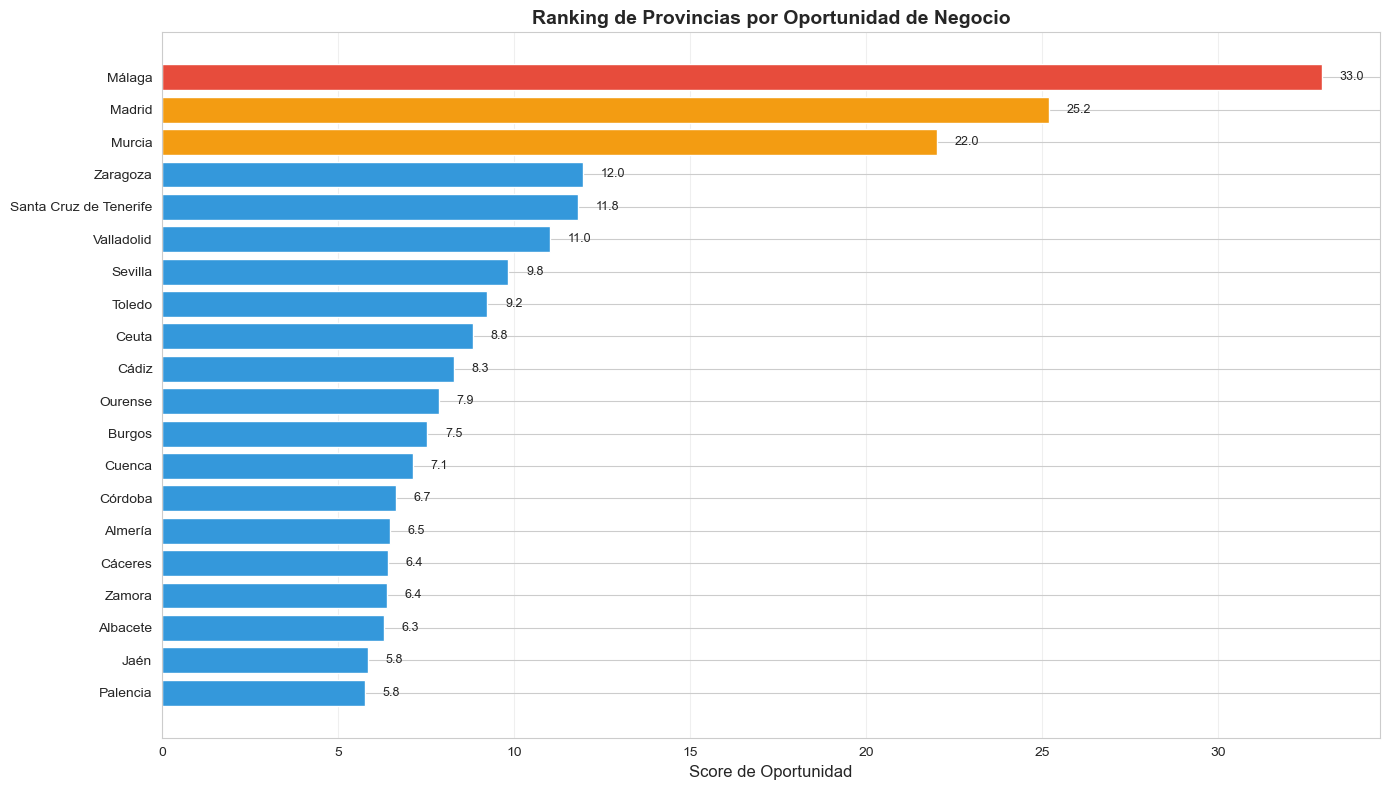

In [28]:
# Visualización del scoring
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#e74c3c' if x > 30 else '#f39c12' if x > 20 else '#3498db' 
          for x in df_top_oportunidades['score_oportunidad']]

ax.barh(range(len(df_top_oportunidades)), 
        df_top_oportunidades['score_oportunidad'],
        color=colors)
ax.set_yticks(range(len(df_top_oportunidades)))
ax.set_yticklabels(df_top_oportunidades['Provincia'])
ax.set_xlabel('Score de Oportunidad', fontsize=12)
ax.set_title('Ranking de Provincias por Oportunidad de Negocio', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for i, v in enumerate(df_top_oportunidades['score_oportunidad']):
    ax.text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 7.2 Análisis por Tipo de Órgano en Provincias Clave

In [29]:
# Seleccionar top 5 provincias
top5_provincias = df_top_oportunidades.head(5)['Provincia'].tolist()

df_tipo_organo = (
    df_umbral[
        df_umbral['Provincia'].isin(top5_provincias)
    ]
    .groupby(['Provincia', 'tipo_organo'])
    .agg(
        contratos=('id_entry', 'count'),
        empresas=('empresa_nombre', 'nunique'),
        importe_total=('importe_sin_impuestos', 'sum')
    )
    .reset_index()
)

df_tipo_organo['ratio'] = df_tipo_organo['contratos'] / df_tipo_organo['empresas']

print("\n📊 DETALLE POR TIPO DE ÓRGANO EN TOP 5 PROVINCIAS\n")
for provincia in top5_provincias:
    print(f"\n{'='*60}")
    print(f"PROVINCIA: {provincia}")
    print('='*60)
    subset = df_tipo_organo[df_tipo_organo['Provincia'] == provincia].sort_values('ratio', ascending=False)
    print(subset.to_string(index=False))


📊 DETALLE POR TIPO DE ÓRGANO EN TOP 5 PROVINCIAS


PROVINCIA: Málaga
Provincia                                                            tipo_organo  contratos  empresas  importe_total    ratio
   Málaga Organismo de Derecho público bajo el control de una autoridad regional       6052      1547     6619323.39 3.912088
   Málaga                                                      Autoridad estatal         10         6       12009.14 1.666667
   Málaga    Organismo de Derecho público bajo el control de una autoridad local         41        30      335733.12 1.366667
   Málaga                                                        Autoridad local        228       192     1496634.05 1.187500

PROVINCIA: Madrid
Provincia                                                            tipo_organo  contratos  empresas  importe_total    ratio
   Madrid Organismo de Derecho público bajo el control de una autoridad regional        235        74      367226.32 3.175676
   Madrid  Organismo de Derec

### 7.3 Análisis de Código Postal (Granularidad Local)

In [30]:
# Análisis por código postal en top provincias
df_postal = (
    df_umbral[
        (df_umbral['Provincia'].isin(top5_provincias)) &
        (df_umbral['organo_postalcode'].notna())
    ]
    .groupby(['Provincia', 'organo_postalcode'])
    .agg(
        contratos=('id_entry', 'count'),
        empresas=('empresa_nombre', 'nunique'),
        importe_total=('importe_sin_impuestos', 'sum')
    )
    .reset_index()
)

df_postal['ratio'] = df_postal['contratos'] / df_postal['empresas']

# Filtrar zonas con volumen mínimo
df_postal_filtrado = df_postal[
    df_postal['contratos'] >= 10
].sort_values(['Provincia', 'ratio'], ascending=[True, False])

print("\n📍 CÓDIGOS POSTALES CON BAJA COMPETENCIA (Top provincias)\n")
for provincia in top5_provincias:
    print(f"\n{'='*60}")
    print(f"PROVINCIA: {provincia}")
    print('='*60)
    subset = df_postal_filtrado[
        df_postal_filtrado['Provincia'] == provincia
    ].head(10)
    
    if len(subset) > 0:
        print(subset.to_string(index=False))
    else:
        print("No hay datos suficientes para esta provincia.")


📍 CÓDIGOS POSTALES CON BAJA COMPETENCIA (Top provincias)


PROVINCIA: Málaga
Provincia organo_postalcode  contratos  empresas  importe_total    ratio
   Málaga             29071       6052      1547     6619323.39 3.912088
   Málaga             29691         75        51      195695.47 1.470588
   Málaga             29007         14        10      110266.29 1.400000
   Málaga             29004        121       100      976584.95 1.210000
   Málaga             29003         10         9       79374.20 1.111111
   Málaga             29012         10        10       59742.04 1.000000

PROVINCIA: Madrid
Provincia organo_postalcode  contratos  empresas  importe_total    ratio
   Madrid             28041         19        10       41979.66 1.900000
   Madrid             28046        260       150     1078403.97 1.733333
   Madrid             28222        455       284      692319.54 1.602113
   Madrid             28007        117        77      562950.64 1.519481
   Madrid             28006

---

## 8. Conclusiones Ejecutivas

In [31]:
# Resumen estadístico final
print("="*70)
print("RESUMEN EJECUTIVO - OPORTUNIDADES EN CONTRATOS MENORES")
print("="*70)

print(f"\n📊 DATOS GENERALES:")
print(f"  • Total contratos analizados: {len(df_umbral):,}")
print(f"  • Periodo: 2020-2025")
print(f"  • Importe total: {df_umbral['importe_sin_impuestos'].sum()/1e9:.2f} mil millones €")
print(f"  • Importe medio por contrato: {df_umbral['importe_sin_impuestos'].mean():,.0f} €")

print(f"\n🎯 COMPETENCIA:")
print(f"  • Provincias con competencia BAJA/MUY BAJA: {len(df_competencia[df_competencia['nivel_competencia'].isin(['Baja', 'Muy Baja'])])}")
print(f"  • Ratio medio contratos/empresa: {df_competencia['ratio_contratos_empresa'].mean():.2f}")
print(f"  • Ratio mediano: {df_competencia['ratio_contratos_empresa'].median():.2f}")

print(f"\n🏆 TOP 3 PROVINCIAS RECOMENDADAS:")
for i, row in df_top_oportunidades.head(3).iterrows():
    print(f"\n  {i+1}. {row['Provincia']} ({row['Comunidad']})")
    print(f"     • Contratos: {row['num_contratos']:,}")
    print(f"     • Empresas activas: {row['num_empresas']:,}")
    print(f"     • Ratio: {row['ratio_contratos_empresa']:.2f} contratos/empresa")
    print(f"     • Importe medio: {row['importe_medio']:,.0f} €")
    print(f"     • Score de oportunidad: {row['score_oportunidad']:.2f}")

print("\n" + "="*70)
print("RECOMENDACIÓN: Priorizar entrada en provincias con ratio > 10")
print("              y volumen de contratos > 100 anuales")
print("="*70)

RESUMEN EJECUTIVO - OPORTUNIDADES EN CONTRATOS MENORES

📊 DATOS GENERALES:
  • Total contratos analizados: 49,848
  • Periodo: 2020-2025
  • Importe total: 0.20 mil millones €
  • Importe medio por contrato: 4,025 €

🎯 COMPETENCIA:
  • Provincias con competencia BAJA/MUY BAJA: 0
  • Ratio medio contratos/empresa: 1.29
  • Ratio mediano: 1.16

🏆 TOP 3 PROVINCIAS RECOMENDADAS:

  30. Málaga (Andalucía)
     • Contratos: 6,331
     • Empresas activas: 1,773
     • Ratio: 3.57 contratos/empresa
     • Importe medio: 1,337 €
     • Score de oportunidad: 32.96

  27. Madrid (Madrid)
     • Contratos: 4,064
     • Empresas activas: 3,032
     • Ratio: 1.34 contratos/empresa
     • Importe medio: 6,029 €
     • Score de oportunidad: 25.20

  29. Murcia (Murcia)
     • Contratos: 4,150
     • Empresas activas: 1,994
     • Ratio: 2.08 contratos/empresa
     • Importe medio: 1,512 €
     • Score de oportunidad: 22.03

RECOMENDACIÓN: Priorizar entrada en provincias con ratio > 10
              y 

### Interpretación del Score de Oportunidad

El **score de oportunidad** combina tres factores clave:

1. **Baja competencia** (50%): Ratio contratos/empresa elevado indica pocas empresas compitiendo por cada contrato
2. **Volumen de mercado** (30%): Número absoluto de contratos disponibles
3. **Valor medio** (20%): Importe promedio por contrato

**Provincias con score > 30** son objetivos prioritarios para expansión.

---

### Próximos Pasos Sugeridos

1. **Análisis sectorial**: Identificar CPV (códigos de clasificación) con mayor demanda en provincias objetivo
2. **Estudio temporal**: Detectar estacionalidad en la publicación de contratos
3. **Perfil de organismos**: Caracterizar organismos más activos por provincia
4. **Benchmarking competitivo**: Analizar empresas ganadoras frecuentes para identificar estrategias exitosas

---